# IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp
mp.style.use('fivethirtyeight')

In [2]:
admission_df = pd.read_csv(r'C:\Users\User\Project\Admission_Predict.csv')

In [3]:
# Let's drop the serial no.
admission_df.drop('Serial No.', axis='columns', inplace=True)

# PERFORM EXPLORATORY DATA ANALYSIS

In [4]:
# checking the null values
admission_df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

As we can see there aren't any NaN values in the dataframe.

In [5]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


* The dataframe consists of a total of 500 entries.
* The columns **GRE Score**, **TOEFL Score**, **University Rating**, **Research** are of **int64** type.
* The columns **SOP**, **LOR**, **CGPA** are of **float64** type.
* The dependent / target variable **Chance of Admit** is of **float64** type.
* The dataframe takes up a memory of 31.4 KB.

In [6]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
# Grouping by University ranking and applying Mean on the data.
admission_df.groupby('University Rating').min()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,290,92,1.0,1.0,6.80,0,0.36
2,293,95,1.0,1.5,7.28,0,0.34
3,298,97,2.0,1.5,7.40,0,0.36
4,290,100,1.5,2.0,7.46,0,0.42
5,303,103,3.0,3.0,8.48,0,0.61


In [8]:
admission_df.groupby('University Rating').max()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,318,109,3.5,3.5,9.12,1,0.78
2,332,118,4.5,4.0,9.36,1,0.90
3,331,120,5.0,5.0,9.32,1,0.90
4,340,120,5.0,5.0,9.92,1,0.97
5,340,120,5.0,5.0,9.91,1,0.97


In [9]:
admission_df.groupby('University Rating').mean()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


# PERFORM DATA VISUALIZATION

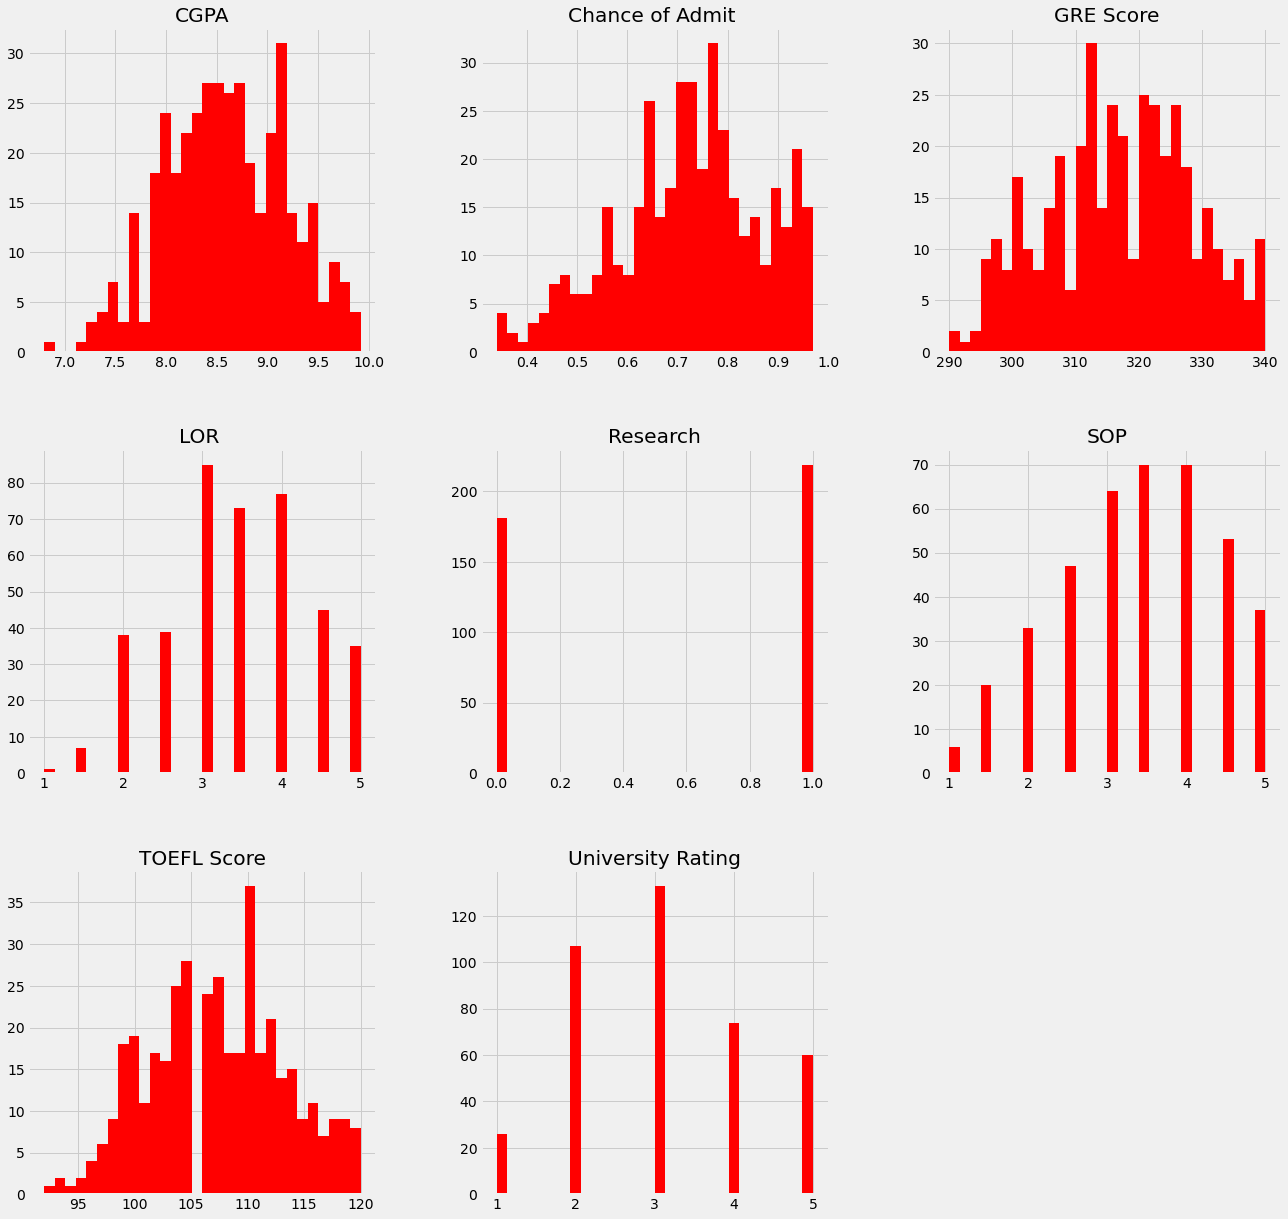

In [10]:
_ = admission_df.hist(bins = 30, figsize=(20, 20), color='r')

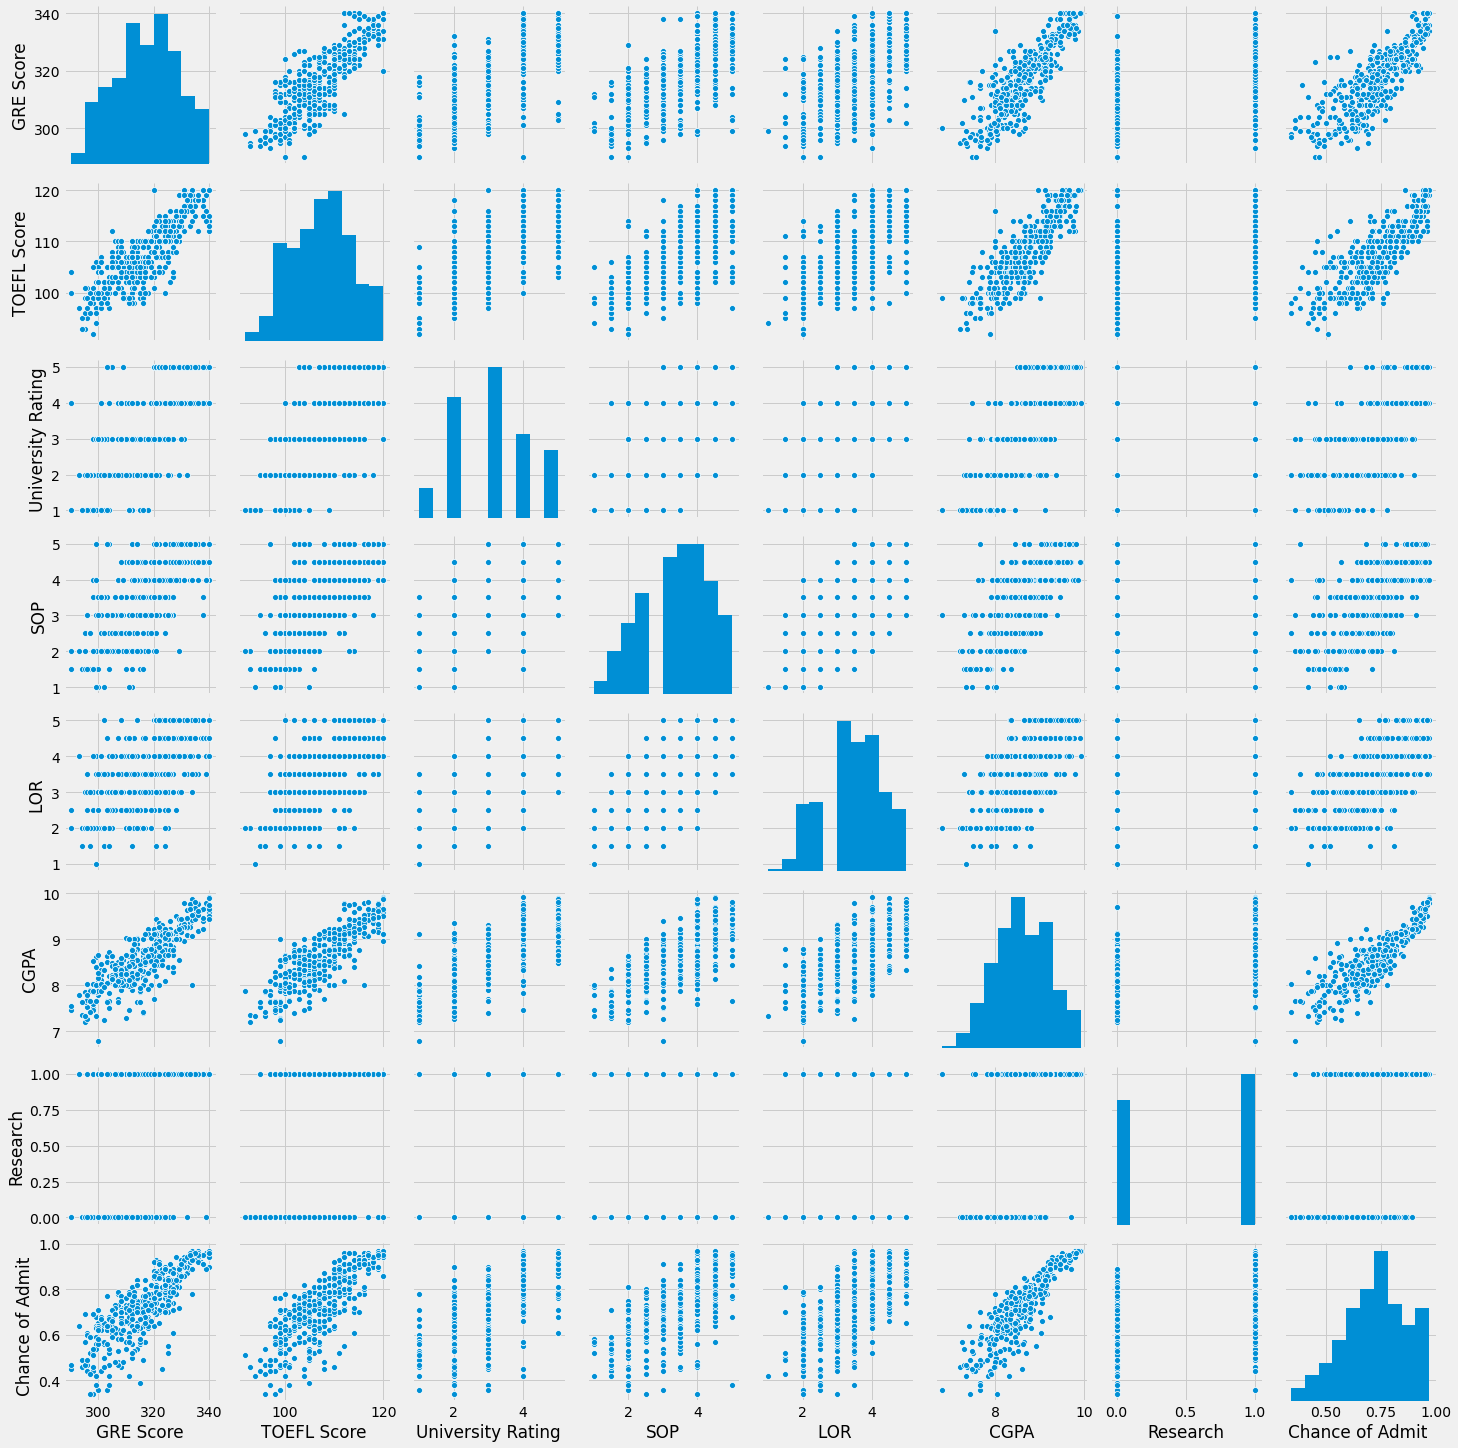

In [11]:
_ = sns.pairplot(admission_df)

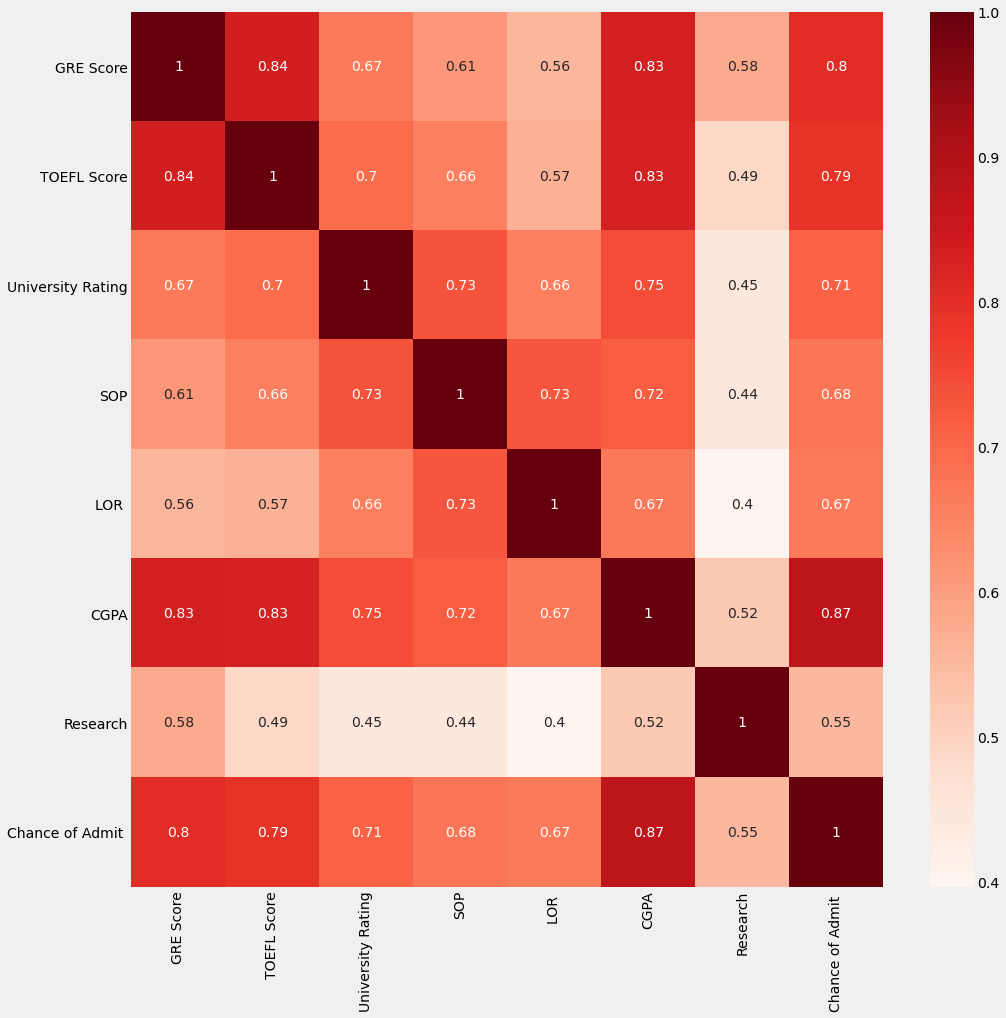

In [12]:
corr = admission_df.corr()
mp.figure(figsize = (15, 15))
_ = sns.heatmap(corr, annot=True, cmap='Reds')

The target variable **Chance of Admit** depends the most on **GRE Score** and the least on **Research**.

# OUTLIERS

GRE Score


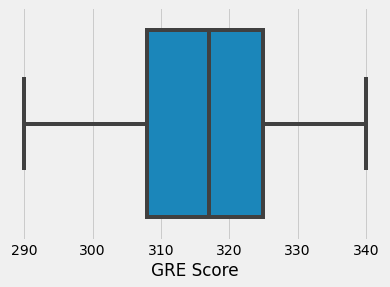

TOEFL Score


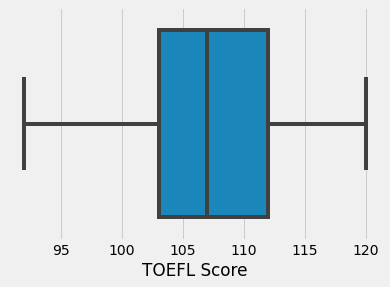

University Rating


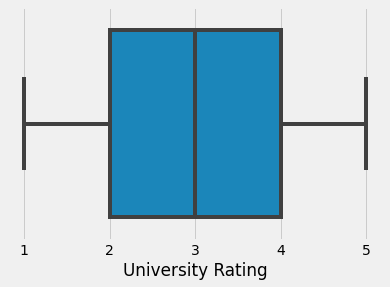

SOP


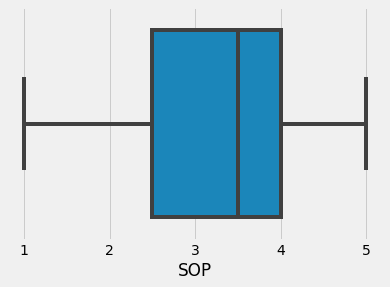

LOR 


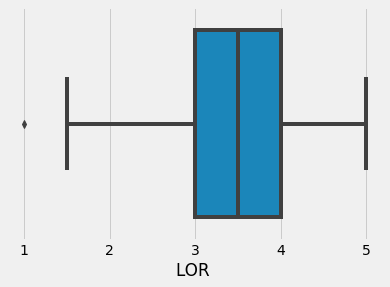

CGPA


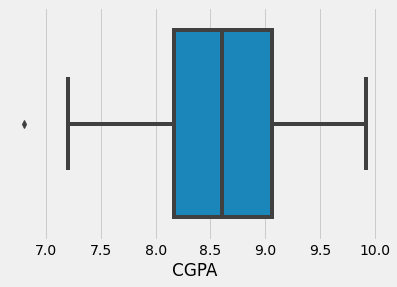

Research


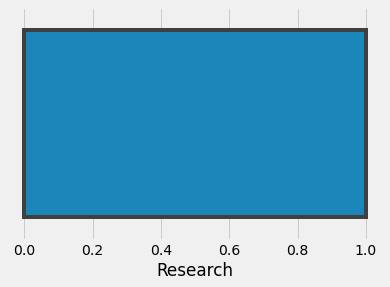

Chance of Admit 


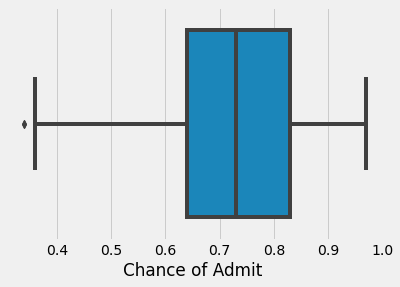

In [13]:
abc=list(admission_df.columns.values)
for col in abc:
    sns.boxplot(admission_df[col])
    print(col)
    mp.show()

# CREATE TRAINING AND TESTING DATASET

In [14]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [15]:
x = admission_df.iloc[:,0:7]
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [16]:
y = admission_df.iloc[:,-1]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [17]:
x.shape

(400, 7)

In [18]:
y.shape

(400,)

In [19]:
x = np.array(x)
y = np.array(y).reshape(-1, 1)
y.shape

(400, 1)

In [20]:
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
x

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [22]:
import joblib
joblib.dump(scaler_x,'transform')

['transform']

In [23]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [24]:
x_train

array([[ 0.4531256 ,  0.42725722, -0.07660001, ..., -1.06145431,
         0.11933921,  0.90911166],
       [ 0.10406399,  0.42725722, -0.07660001, ..., -0.50426044,
         0.33761705, -1.09997489],
       [ 2.02390285,  2.076899  ,  1.67425725, ...,  1.16732114,
         2.20137395,  0.90911166],
       ...,
       [-0.94312084, -0.39756367, -0.95202863, ..., -0.50426044,
        -0.63623792,  0.90911166],
       [-1.29218245, -1.38734873, -1.82745726, ..., -1.61864817,
        -2.26492638, -1.09997489],
       [-0.24499762, -0.23259949, -0.95202863, ...,  0.05293342,
        -0.58586611, -1.09997489]])

In [25]:
y_train

array([[0.8 ],
       [0.63],
       [0.97],
       [0.74],
       [0.58],
       [0.56],
       [0.8 ],
       [0.66],
       [0.93],
       [0.64],
       [0.64],
       [0.83],
       [0.47],
       [0.76],
       [0.71],
       [0.66],
       [0.79],
       [0.78],
       [0.59],
       [0.72],
       [0.71],
       [0.61],
       [0.66],
       [0.61],
       [0.79],
       [0.68],
       [0.62],
       [0.71],
       [0.73],
       [0.62],
       [0.77],
       [0.53],
       [0.56],
       [0.46],
       [0.86],
       [0.48],
       [0.46],
       [0.93],
       [0.74],
       [0.8 ],
       [0.65],
       [0.68],
       [0.65],
       [0.42],
       [0.97],
       [0.85],
       [0.73],
       [0.75],
       [0.64],
       [0.81],
       [0.84],
       [0.81],
       [0.77],
       [0.82],
       [0.71],
       [0.77],
       [0.82],
       [0.71],
       [0.84],
       [0.8 ],
       [0.64],
       [0.78],
       [0.56],
       [0.77],
       [0.73],
       [0.94],
       [0.

# TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [27]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [28]:
joblib.dump(linreg,"admission.save")

['admission.save']

In [29]:
y_pred=linreg.predict(x_test)
y_pred

array([[0.65117446],
       [0.72368741],
       [0.93536809],
       [0.82164316],
       [0.58158673],
       [0.92863016],
       [0.52682366],
       [0.54308993],
       [0.65940583],
       [0.83834924],
       [0.72008833],
       [0.90749769],
       [0.55354476],
       [0.89008648],
       [0.70389539],
       [0.68664473],
       [0.66657268],
       [0.48196096],
       [0.69057217],
       [0.97493132],
       [0.58802433],
       [0.65286881],
       [0.71150098],
       [0.53528647],
       [0.94677007],
       [0.80982947],
       [0.69459383],
       [0.56495613],
       [0.68192423],
       [0.81039878],
       [0.80796481],
       [0.94640983],
       [0.64599494],
       [0.51104918],
       [0.65983663],
       [0.66907811],
       [0.71572271],
       [0.64556878],
       [0.61540702],
       [0.87367833],
       [0.74275261],
       [0.59782649],
       [0.77456683],
       [0.95944897],
       [0.85124125],
       [0.83554825],
       [0.94662422],
       [0.648

In [30]:
y_test

array([[0.68],
       [0.68],
       [0.9 ],
       [0.79],
       [0.44],
       [0.94],
       [0.43],
       [0.36],
       [0.72],
       [0.85],
       [0.45],
       [0.93],
       [0.64],
       [0.93],
       [0.71],
       [0.53],
       [0.66],
       [0.34],
       [0.74],
       [0.96],
       [0.64],
       [0.54],
       [0.71],
       [0.54],
       [0.92],
       [0.84],
       [0.59],
       [0.61],
       [0.7 ],
       [0.74],
       [0.82],
       [0.94],
       [0.71],
       [0.46],
       [0.69],
       [0.56],
       [0.72],
       [0.58],
       [0.61],
       [0.9 ],
       [0.73],
       [0.64],
       [0.74],
       [0.94],
       [0.92],
       [0.82],
       [0.96],
       [0.71],
       [0.94],
       [0.89],
       [0.86],
       [0.73],
       [0.81],
       [0.94],
       [0.39],
       [0.48],
       [0.71],
       [0.86],
       [0.65],
       [0.86],
       [0.57],
       [0.61],
       [0.79],
       [0.44],
       [0.64],
       [0.74],
       [0.

In [31]:
accuracy_linreg = linreg.score(x_test, y_test)
accuracy_linreg

0.8212082591486991

# TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [32]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [33]:
accuracy_DT = DT.score(x_test, y_test)
accuracy_DT

0.603701832461525

In [34]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 200, max_depth = 10)
RF.fit(x_train, y_train)

<ipython-input-34-06e89c271be8>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=200)

In [35]:
accuracy_RF = RF.score(x_test, y_test)
accuracy_RF

0.8131775345776905

# COMPARING ALGORITHMS

Text(0, 0.5, 'Accuracy')

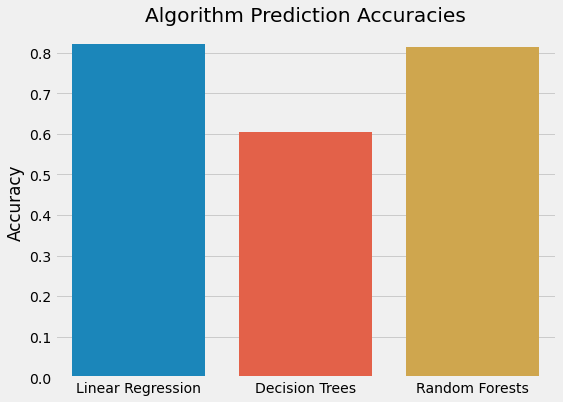

In [36]:
Methods = ['Linear Regression', 'Decision Trees', 'Random Forests']
Scores = np.array([accuracy_linreg, accuracy_DT, accuracy_RF])

fig, ax = mp.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
mp.title('Algorithm Prediction Accuracies')
mp.ylabel('Accuracy')